# Implementation of Morphology Filters and Segmentation for Improving the Simple Python Optical Character Recognition (OCR) System 

> **Hafara Firdausi**
> 05111950010040

## Description
In this assignment, I implemented a simple Python Optical Character Recognition (OCR) system using Tesseract. Then, I applied and compared several types of morphology filters and segmentation in the image to improve OCR results.

## Tools
* Tesseract
* Python 3.7
* Some Python libraries:
  * Open-CV
  * PyTesseract

## Installation
### Tesseract
Tesseract is an open-source OCR engine. It began as a Ph.D. research project in HP Labs Bristol, then developed by **HP** between 1984 and 1994. In 2005, HP released Tesseract as an open-source software. Since 2006 it is developed by **Google**.

1. Using Homebrew to install Tesseract in Mac
    ```bash
    $ brew install tesseract

    # This formula contains only the "eng", "osd", and "snum" language data files.
    # If you need any other supported languages, run `brew install tesseract-lang`.

    # To install other languages
    $ brew install tesseract-lang
    ```
    Installation of Tesseract in other OS will be different.

## Implementation

In [1]:
# import libraries
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import os
from math import ceil

In [2]:
# constant global variables

IMG_PATH = "img/"
IMG_NAME = "teks.png"
DEST_PATH = "preprocessed_img/" + IMG_NAME.split('.')[0] + "/"
OCR_PATH = "result/" + IMG_NAME.split('.')[0] + "/"

In [3]:
# OS Handler

def get_list(path, list_type='img'):
    my_list = []
    if list_type == 'img':
        valid_list = ['.jpg', '.png', '.jpeg']
    elif list_type == 'txt':
        valid_list = ['.txt']
    # get all image name
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if not (ext.lower() in valid_list):
            continue
        my_list.append(f)
    return my_list

def check_dir(path):
    # make directory
    if not os.path.exists(path):
        os.makedirs(path)

## 1. Preprocessing

In [4]:
# Preprocessing
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 1.1 Morphology Filters

In [5]:
# 1. Dilation
def dilate(image, kernel=np.ones((5,5),np.uint8)):
    return cv2.dilate(image, kernel, iterations = 1)
    
# 2. Erosion
def erode(image, kernel=np.ones((5,5),np.uint8)):
    return cv2.erode(image, kernel, iterations = 1)

# 3. Opening - erosion followed by dilation
def opening(image, kernel=np.ones((5,5),np.uint8)):
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 4. Closing - dilation followed by erosion
def closing(image, kernel=np.ones((5,5),np.uint8)):
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# 5. Canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

### 1.2 Segmentation - Thresholding

In [6]:
# 1. Thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# 2. Adaptive Thresholding using mean value 
def adaptive_mean_thresholding(image):
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)

# 2. Adaptive Thresholding using gaussian value 
def adaptive_gaussian_thresholding(image):
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)

### 1.3 Applying Morphology and Segmentation

In [7]:
def apply_filter(image):
    gray_image = get_grayscale(image)
    scenarios = {
        'thresholding': thresholding,
        'adp-mean-thresholding': adaptive_mean_thresholding,
        'adp-gaussian-thresholding': adaptive_gaussian_thresholding,
        'opening': opening,
        'closing': closing,
        'dilate': dilate,
        'erode': erode,
        'canny': canny
    }
    for key, function in scenarios.items():
        prep_image = function(gray_image)
        filename = key + '_' + IMG_NAME
        # save file
        try:
            cv2.imwrite(DEST_PATH + filename, prep_image[:,:,::-1])
        except IndexError:
            cv2.imwrite(DEST_PATH + filename, prep_image)

## 2. Processing
### 2.1 Optical Character Recognition (OCR)

In [8]:
def ocr(image, image_name):
    filename = image_name + '_output.txt'
    # Adding custom options
    custom_config = r'--oem 3 --psm 6'
    with open(OCR_PATH + filename, 'w') as f:
        f.write(pytesseract.image_to_string(image, config=custom_config))

### 2.2 Displaying Results

In [9]:
def generate_plot(total_img, num_img_each_row=2):
    row = ceil(total_img / num_img_each_row) * 100
    col = num_img_each_row * 10
    return row + col

def display_img(dest_path, fig_size=(17, 20)):
    imgs_name = [IMG_NAME] + get_list(dest_path)
    # generate plot
    plot = generate_plot(len(imgs_name))
    # plotting
    fig = plt.figure(figsize=fig_size)
    for i in range(plot, plot + len(imgs_name)):
        title = imgs_name[i - plot].split('_')[0]
        img_path = IMG_PATH + imgs_name[i - plot] if i == plot else dest_path + imgs_name[i - plot]
        img = cv2.imread(img_path)[:,:,::-1]
        plt.subplot(i + 1), plt.imshow(img)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
    plt.show()

def display_ocr_result():
    files = get_list(OCR_PATH, 'txt')
    for filename in files:
        f = open(OCR_PATH + filename, 'r')
        file_contents = f.read()
        print ('=========================')
        print (filename)
        print ('=========================')
        print (file_contents)
        print ('=========================')
        f.close()
    
    
    
# compare file
# files = get_list(OCR_PATH, 'txt')
# ori_file = 'original_' + IMG_NAME.split('.')[0] + '_output.txt'
# files.remove(ori_file)
# for file_name in files:
#     with open(OCR_PATH + ori_file, 'r') as file1:
#         with open(OCR_PATH + file_name, 'r') as file2:
#             same = set(file1).intersection(file2)
#     same.discard('\n')
#     with open(OCR_COMPARE_PATH + 'ori_' + file_name.split('_')[0] + '.txt', 'w') as file_out:
#         total_char = 0
#         for line in same:
#             file_out.write(line)
#             total_char += len(line)
#         print('ori_{}.txt ===> {}'.format(file_name.split('_')[0], total_char))

### 2.3 Main Program

In [10]:
# check and create all dirs
check_dir(DEST_PATH)
check_dir(OCR_PATH)

# preprocessing
image = cv2.imread(IMG_PATH + IMG_NAME)[:,:,::-1]
apply_filter(image)

# OCR original img
image = cv2.imread(IMG_PATH + IMG_NAME)[:,:,::-1]
ocr(image, 'original_' + IMG_NAME.split('.')[0])

# OCR preprocessed img
imgs = get_list(DEST_PATH)
for img_name in imgs:
    image = cv2.imread(DEST_PATH + img_name)[:,:,::-1]
    ocr(image, img_name.split('.')[0])

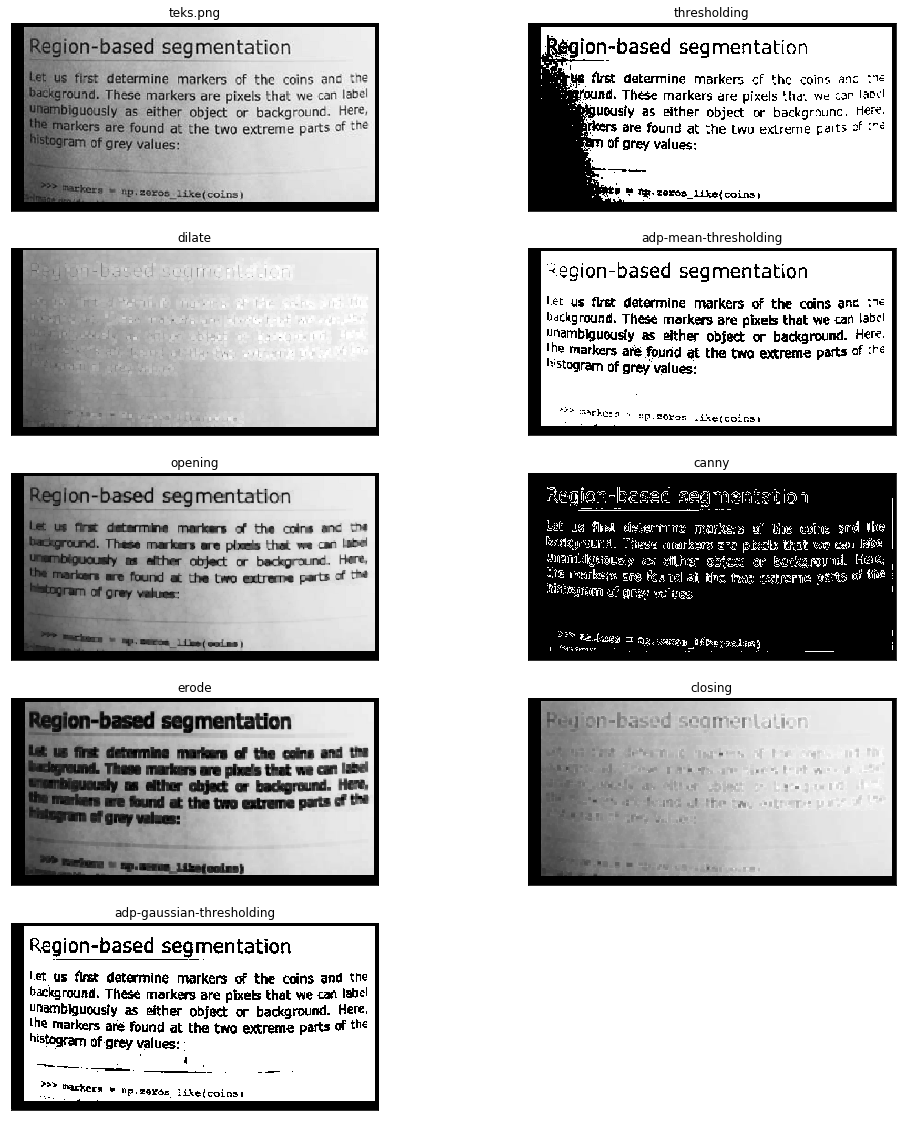

In [11]:
# display preprocessed image
display_img(DEST_PATH)

In [12]:
# display text
display_ocr_result()

canny_teks_output.txt
Region-based segmentation
Sales secon Mn cece mR CMeo CCM
background. These markers are pixels that we can Jabel
unambiguously as either ebject or beckground. Here;
the merkers are found at the tao extreme parts of the
Doce iatc tate tere

oe eile & fg. caren _Liteq cols)
adp-gaussian-thresholding_teks_output.txt
Region-based seqmentation

Let us first determine markers of the coins and the
background. These markers are pixels that we car labe!
unambiguously as either object or background. Here.
the markers até found at the two extreme parts. of the
histagram of grey values: -

wa a ee

= narkera ¥ NP. zeras Like(coins)
adp-mean-thresholding_teks_output.txt
Region-based segmentation
Let us first determine markers of the coins and the
background. These markers are pixels that we can labe!
Unambiguously as either object or background. Here.
the markers até found at the two extreme parts of the
histagram of grey values:

-” markers ‘ OP. 2eron like(coins)
thresholdin